<a href="https://colab.research.google.com/github/LM1997610/Social_Networks/blob/main/final_project/Untitled30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Social Networks and Online Markets</center></h1>
## <h2><center>Aris project</center></h2>
## <h4><center>2023/2024</center></h4>
## <h3><center>Luca Mazzucco: 1997610</center></h3>

In [1]:
! pip -q install scikit-network

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 14.1 MB/s eta 0:00:00


In [2]:
from sknetwork.data import load_netset

import networkx as nx
import matplotlib.pyplot as plt

from collections import Counter
from pprint import pprint
from tabulate import tabulate

import os

In [3]:
! git clone -q https://github.com/LM1997610/Social_Networks

if os.getcwd().split('/')[-1] != 'Social_Networks':
   os.chdir('Social_Networks/final_project')

In [4]:
from visualize import visualize_degree_distrib

In [5]:
wikivitals = load_netset('wikivitals')

Unpacking archive...
Parsing files...
Done.


In [6]:
label_id = {name: i for i, name in enumerate(wikivitals.names_labels)}

counted_topics = {category: Counter(wikivitals.labels)[id] for category, id in label_id.items()}

table_data = [(category, count) for category, count in counted_topics.items()]
print(tabulate(table_data, headers=["Label", "Counter"]))

Label                             Counter
------------------------------  ---------
Arts                                  673
Biological and health sciences       1479
Everyday life                         479
Geography                            1201
History                               680
Mathematics                           300
People                               1991
Philosophy and religion               435
Physical sciences                    1097
Society and social sciences           930
Technology                            746


In [7]:
G = nx.from_numpy_array(wikivitals.adjacency.toarray())

print()
print(f'Number of nodes: {len(G.nodes)}')
print(f'Number of edges: {len(G.edges)}\n')

self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)

print(f'>> removed {len(self_loops)} edges from the graph: {len(G.edges)}\n')

isolated_nodes = [node for node in G.nodes if G.degree(node) == 0]
print(f'Number of isolated nodes: {len(isolated_nodes)}')


Number of nodes: 10011
Number of edges: 655192

>> removed 1380 edges from the graph: 653812

Number of isolated nodes: 0


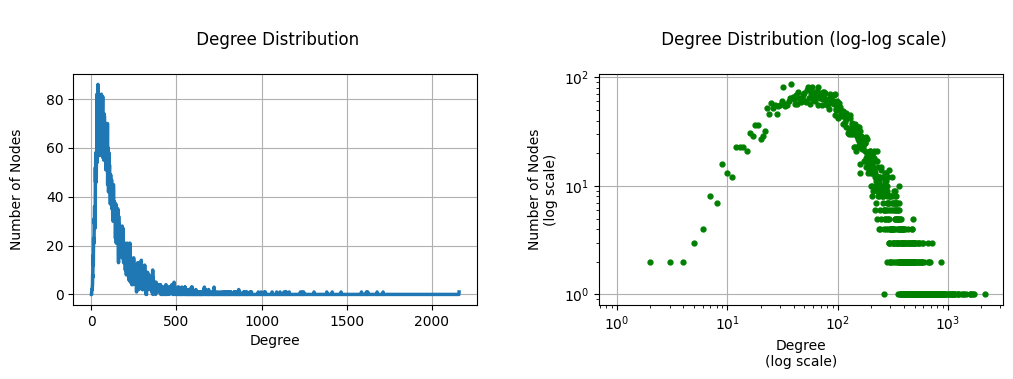

In [15]:
degree_distrib = nx.degree_histogram(G)
nodes = [i for i in range(0, len(degree_distrib))]

degree_distrib = [degree_distrib[i] for i in range(len(degree_distrib))]

visualize_degree_distrib(nodes, degree_distrib)

In [ ]:
## per ogni categoria quali sono gli articoli piu citati ?

In [64]:
def top_cited_articles(class_id):

  this_class = [x for x,y in enumerate(wikivitals.labels) if y == class_id]
  subgraph = G.subgraph(this_class)

  node_edge_counts = {node: subgraph.degree(node) for node in subgraph.nodes()}

  top_nodes = {k: v for k, v in sorted(node_edge_counts.items(), key=lambda item: item[1], reverse=True)}

  top_nodes_names = {wikivitals.names[idx]: count for idx, count in top_nodes.items()}

  return [(k, top_nodes_names[k]) for k in list(top_nodes_names)][:5]

In [94]:
for i in range(10):

  this_label = [key for key in label_id.keys() if label_id[key] == i][0]
  this_top =  [x[0] for x in top_cited_articles(i)]
  this_top = ["'" + s + "'" for s in this_top]

  print(f'{[this_label]} → {", ".join(this_top)}')

['Arts'] → 'Romanticism', 'Modernism', 'Baroque', 'Symbolism (arts)', 'Sculpture'
['Biological and health sciences'] → 'Taxonomy (biology)', 'Animal', 'Chordate', 'Species', 'Plant'
['Everyday life'] → 'Olympic Games', 'Food', 'Marriage', 'Sport', 'Association football'
['Geography'] → 'Geographic coordinate system', 'United States', 'France', 'Europe', 'China'
['History'] → 'Ottoman Empire', 'Roman Empire', 'Byzantine Empire', 'Russian Empire', 'British Empire'
['Mathematics'] → 'Real number', 'Mathematical analysis', 'Function (mathematics)', 'Mathematics', 'Geometry'
['People'] → 'Aristotle', 'Ralph Waldo Emerson', 'Bertrand Russell', 'Georg Wilhelm Friedrich Hegel', 'Plato'
['Philosophy and religion'] → 'Religion', 'Christianity', 'Mysticism', 'Polytheism', 'Zoroastrianism'
['Physical sciences'] → 'Oxygen', 'Earth', 'Hydrogen', 'Density', 'Carbon'
['Society and social sciences'] → 'Slavery', 'English language', 'The New York Times', 'Latin', 'French language'
